In [0]:
%pip install pyspark

In [0]:
%pip install seaborn

In [0]:
%pip install pandas

In [0]:
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/shared_uploads/ssingh88@gmu.edu/global_power_plant_database.csv")
display(df1)

country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,null,null,null,null,null,GEODB,http://globalenergyobservatory.org,GEODB,1009793,2017,null,null,null,null,null,null,null,null,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,null,null,null,null,null,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,null,null,null,null,null,null,null,null,null,null,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,null,null,null,null,null,Wiki-Solar,https://www.wiki-solar.org,Wiki-Solar,null,null,null,null,null,null,null,null,null,null,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,null,null,null,null,null,GEODB,http://globalenergyobservatory.org,GEODB,1009795,2017,null,null,null,null,null,null,null,null,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,null,null,null,null,null,GEODB,http://globalenergyobservatory.org,GEODB,1009797,2017,null,null,null,null,null,null,null,null,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant Afghanistan,GEODB0040536,11.55,34.4847,70.3633,Hydro,null,null,null,null,null,GEODB,http://globalenergyobservatory.org,GEODB,1009787,2017,null,null,null,null,null,null,null,null,58.77,54.42,42.71,59.72,46.12,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.0,34.5638,69.1134,Gas,null,null,null,null,null,GEODB,http://globalenergyobservatory.org,GEODB,null,2017,null,null,null,null,null,null,null,null,null,null,null,null,null,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION
AFG,Afghanistan,Pul-e-Khumri Hydroelectric Power Plant Afghanistan,GEODB0040537,6.0,35.9416,68.7100,Hydro,null,null,null,null,null,GEODB,http://globalenergyobservatory.org,GEODB,null,2017,null,null,null,null,null,null,null,null,21.99,21.19,18.40,25.34,19.74,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
AFG,Afghanistan,Sarobi Dam Hydroelectric Power Plant Afghanistan,GEODB0040535,22.0,34.5865,69.7757,Hydro,null,null,null,null,null,GEODB,http://globalenergyobservatory.org,GEODB,1009799,2017,null,null,null,null,null,null,null,null,123.23,82.87,69.15,93.83,80.00,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
ALB,Albania,Bistrica 1,WRI1002169,27.0,39.9116,20.1047,Hydro,null,null,null,1965.0,null,Energy Charter Secretariat,http://www.energycharter.org/fileadmin/DocumentsMedia/IDEER/IDEER-Albania_2013_en.pdf,GEODB,1021225,null,null,null,null,null,null,null,null,null,105.17,75.26,79.50,105.45,88.45,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [0]:
from pyspark.sql.functions import col

df = df1.drop('country_long','owner', 'source', 'url', 'geolocation_source','generation_data_source','estimated_generation_note_2013', 'estimated_generation_note_2013', 'estimated_generation_note_2014', 'estimated_generation_note_2015', 'estimated_generation_note_2016', 'estimated_generation_note_2017')
df = df.withColumnRenamed('latitude', 'LAT')
df = df.withColumnRenamed('longitude', 'LONG')
df = df.withColumn("LAT", col("LAT").cast("float"))
df = df.withColumn("LONG", col("LONG").cast("float"))
df = df.withColumn("capacity_mw", col("capacity_mw").cast("float"))
df = df.withColumn("generation_gwh_2013", col("generation_gwh_2013").cast("float"))
df = df.withColumn("generation_gwh_2014", col("generation_gwh_2014").cast("float"))
df = df.withColumn("generation_gwh_2015", col("generation_gwh_2015").cast("float"))
df = df.withColumn("generation_gwh_2016", col("generation_gwh_2016").cast("float"))
df = df.withColumn("generation_gwh_2017", col("generation_gwh_2017").cast("float"))
df = df.withColumn("generation_gwh_2018", col("generation_gwh_2018").cast("float"))
df = df.withColumn("generation_gwh_2019", col("generation_gwh_2019").cast("float"))
df = df.withColumn("estimated_generation_gwh_2013", col("estimated_generation_gwh_2013").cast("float"))
df = df.withColumn("estimated_generation_gwh_2014", col("estimated_generation_gwh_2014").cast("float"))
df = df.withColumn("estimated_generation_gwh_2015", col("estimated_generation_gwh_2015").cast("float"))
df = df.withColumn("estimated_generation_gwh_2016", col("estimated_generation_gwh_2016").cast("float"))
df = df.withColumn("estimated_generation_gwh_2017", col("estimated_generation_gwh_2017").cast("float"))


In [0]:
sample_df = df.sample(withReplacement=False, fraction=0.2, seed=0)
sample_df.createOrReplaceTempView("globaldata")

In [0]:
display(sample_df)

country,name,gppd_idnr,capacity_mw,LAT,LONG,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
AFG,Kandahar JOL,WKS0071196,10.0,31.623,65.792,Solar,null,null,null,null,null,null,null,null,null,null,null,null,null,18.64,17.58,19.1,17.62,18.72
ALB,Bistrica 1,WRI1002169,27.0,39.9116,20.1047,Hydro,null,null,null,1965.0,1021225,null,null,null,null,null,null,null,null,105.17,75.26,79.5,105.45,88.45
ALB,Vlora,WRI1002176,98.0,40.4874,19.434,Other,null,null,null,null,1021244,null,null,null,null,null,null,null,null,null,null,null,null,null
DZA,Ain el Ibel II,WKS0073479,53.0,34.342,3.169,Solar,null,null,null,null,null,null,null,null,null,null,null,null,null,null,80.98,81.84,85.66,85.55
DZA,Aoulef,WKS0068908,5.0,26.9989,1.3351,Solar,null,null,null,null,null,null,null,null,null,null,null,null,null,null,8.93,8.71,8.72,8.64
DZA,Chelghoum El Aïd,WKS0065282,15.0,36.225,6.11,Solar,null,null,null,null,null,null,null,null,null,null,null,null,null,null,28.56,28.61,28.69,28.34
DZA,HPC Ouargla,WKS0068918,30.0,32.602,5.834,Solar,null,null,null,null,null,null,null,null,null,null,null,null,null,null,49.38,47.99,50.88,48.72
DZA,In Salah,WKS0068914,5.0,27.183,2.504,Solar,null,null,null,null,null,null,null,null,null,null,null,null,null,null,9.34,8.63,8.8,8.75
DZA,Oued el Ma,WKS0065283,20.0,35.68,5.9861,Solar,null,null,null,null,null,null,null,null,null,null,null,null,null,null,37.41,37.26,37.62,37.38
DZA,Ras Djinet,WRI1023774,672.0,36.8509,3.6983,Gas,Oil,null,null,null,1029505,null,null,null,null,null,null,null,null,null,null,null,null,2805.96


In [0]:
#Describe numerical variables
sample_df.describe('capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',"generation_gwh_2018","generation_gwh_2019").show()

+-------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|summary|       capacity_mw|generation_gwh_2013|generation_gwh_2014|generation_gwh_2015|generation_gwh_2016|generation_gwh_2017|generation_gwh_2018|generation_gwh_2019|
+-------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|  count|              7045|               1298|               1468|               1652|               1842|               1899|               1936|               1929|
|   mean|162.45524876574578|  550.1472637289746|   650.762048291502|  815.3223229835091|  745.5438599389951|  703.6659485027724|  524.2977578653393| 395.45549618576854|
| stddev| 544.4073564034569|  2294.460906979708| 2230.2377391846844| 2718.4166675641372|  2543.842846639994|  2482.814149223085| 1968.4807919293296| 1555.0

In [0]:
#Checking plant with the Max capacity
display(sample_df.filter(sample_df.capacity_mw==22500.0))

country,name,gppd_idnr,capacity_mw,LAT,LONG,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
CHN,Three Gorges Dam,WRI1000452,22500.0,30.8235,111.0032,Hydro,null,null,null,2003.0,1012216,null,null,null,null,null,null,null,null,null,null,null,null,82810.77


In [0]:
#what proportions of the world’s energy are each generated using each fuel type?
display(sample_df.groupBy('country','primary_fuel').count().sort('count',ascending=False))

country,primary_fuel,count
USA,Solar,654
USA,Gas,377
USA,Hydro,289
CHN,Solar,276
GBR,Solar,235
USA,Wind,229
CHN,Hydro,192
IND,Solar,185
FRA,Solar,184
CHN,Wind,184


In [0]:
#what proportions of the world’s energy are each generated using each fuel type?
from pyspark.sql.functions import sum ,avg, round
c_cap = sample_df.groupBy(['country','primary_fuel']).agg(round(sum('capacity_mw'), 1).alias('Total_Capacity'))
display(c_cap.sort('country'))

country,primary_fuel,Total_Capacity
AFG,Solar,10.0
AGO,Hydro,536.0
AGO,Gas,132.0
ALB,Other,98.0
ALB,Hydro,27.0
ARE,Solar,200.0
ARE,Gas,4584.0
ARG,Other,479.2
ARG,Hydro,277.5
ARG,Solar,22.5


Output can only be rendered in Databricks

In [0]:
#Spread of Energy generation in North America
NA_cont = c_cap[c_cap['country'].isin(['USA', 'MEX', 'CAN'])]
display(NA_cont)

country,primary_fuel,Total_Capacity
CAN,Nuclear,660.0
CAN,Coal,2774.0
CAN,Solar,398.4
CAN,Gas,2284.0
CAN,Oil,972.0
CAN,Biomass,352.7
CAN,Hydro,14717.5
CAN,Wind,3198.9
MEX,Hydro,1665.8
USA,Hydro,26000.3


Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
#Europe
EU_C = c_cap[c_cap['country'].isin(['AUT', 'BEL', 'DNK','FRA','DEU','ITA','PRT','ESP','GBR','RUS'])]
display(EU_C)

country,primary_fuel,Total_Capacity
FRA,Solar,821.7
FRA,Nuclear,16840.0
FRA,Wind,1799.4
FRA,Biomass,182.3
DEU,Gas,5261.8
BEL,Gas,153.0
AUT,Gas,1272.0
FRA,Oil,2290.0
DEU,Solar,1228.7
DNK,Wind,678.6


Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
#Asia
asia_C = c_cap[c_cap['country'].isin(['CHN', 'IND', 'IRN','PAK','SAU','KOR','JPN','SGP','RUS'])]
display(asia_C)

country,primary_fuel,Total_Capacity
CHN,Solar,10409.8
CHN,Wind,10892.3
CHN,Coal,164712.0
CHN,Gas,10463.0
CHN,Nuclear,5822.0
CHN,Hydro,66045.3
IND,Nuclear,1080.0
RUS,Gas,24918.8
JPN,Wind,59.0
IND,Biomass,168.5


Output can only be rendered in Databricks

Output can only be rendered in Databricks

[714091.1, 955318.7, 1346912.5, 1373291.8, 1336261.8, 1015040.5, 762833.7]


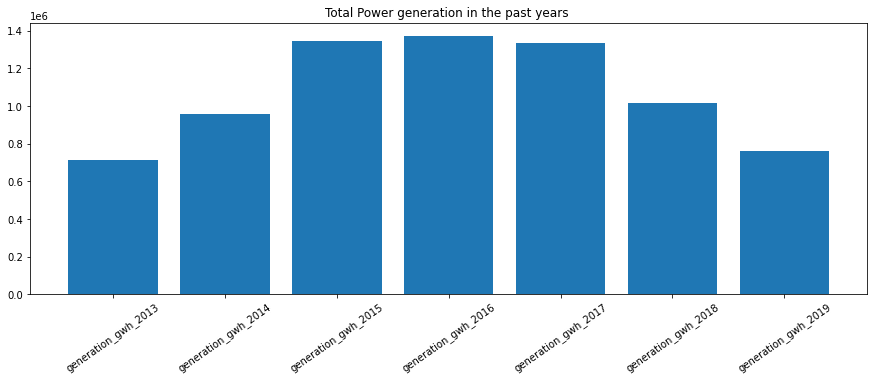

In [0]:
#is there any growth or decline in the energy generation rates?
pd_df = sample_df.toPandas()
cols = ['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017',"generation_gwh_2018","generation_gwh_2019"]
generation=[]
for col in cols:
    generation.append(pd_df[col].sum())
print(generation)
plt.figure(figsize=(15,5))
plt.bar(cols,generation)
plt.xticks(rotation = 35)
plt.title('Total Power generation in the past years ')
plt.show()

In [0]:
#which type of plants tend to have higher plant capacities.
capacity_t = sample_df.groupBy('primary_fuel').agg(round(sum('capacity_mw'),1).alias('SUM'))
display(capacity_t.sort('SUM',ascending=False))

primary_fuel,SUM
Coal,394544.0
Gas,292442.2
Hydro,215517.0
Nuclear,79062.0
Oil,56381.2
Wind,56289.0
Solar,36394.6
Biomass,6350.0
Geothermal,2819.5
Waste,2606.9


Output can only be rendered in Databricks

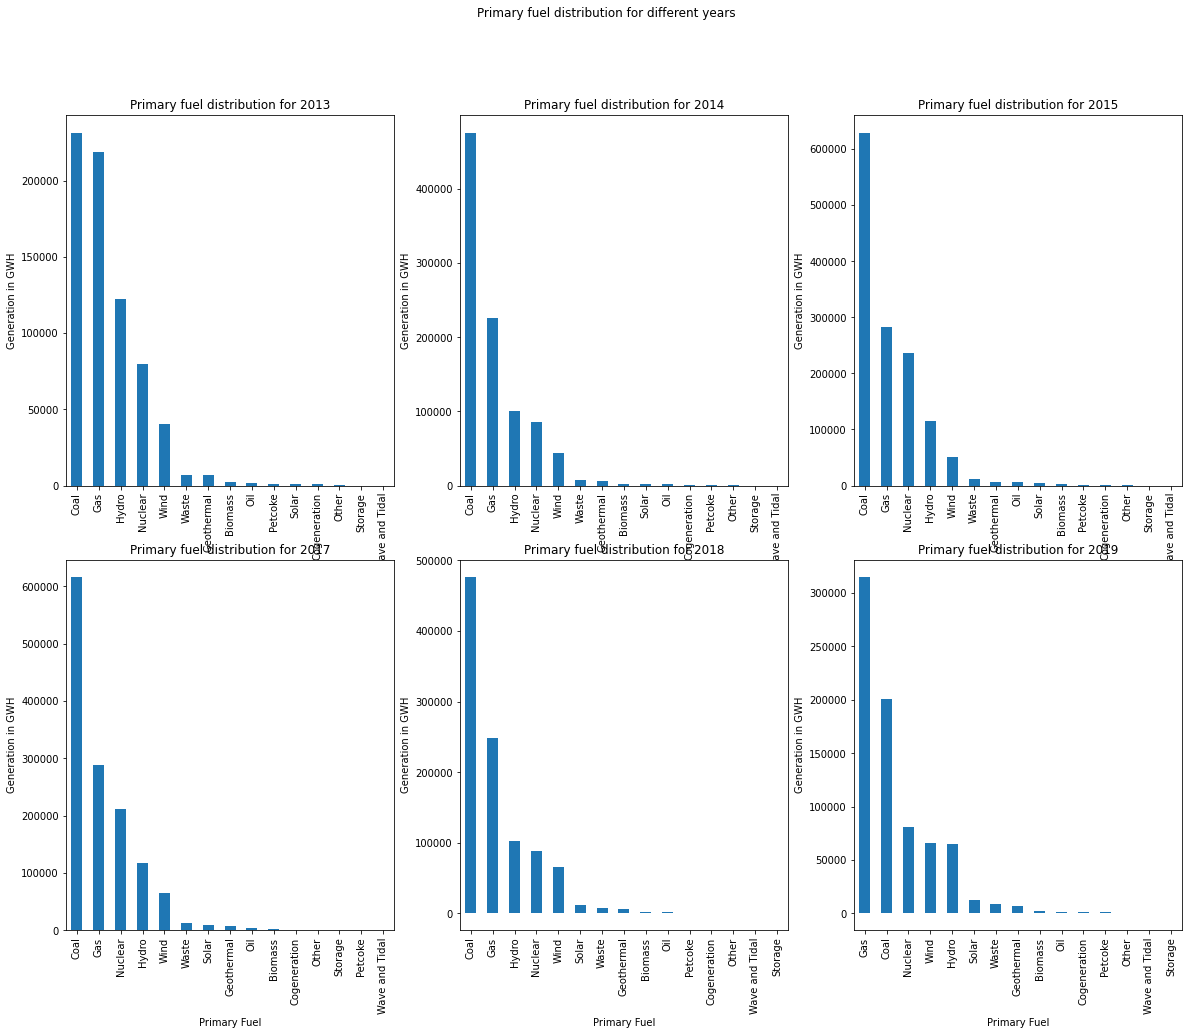

In [0]:
#there any type of plant that sees a decline in energy generated over the years?

# Group by primary fuel and sum generation for each year
gen_13 = pd_df.groupby('primary_fuel')['generation_gwh_2013'].sum().sort_values(ascending=False)
gen_14 = pd_df.groupby('primary_fuel')['generation_gwh_2014'].sum().sort_values(ascending=False)
gen_15 = pd_df.groupby('primary_fuel')['generation_gwh_2015'].sum().sort_values(ascending=False)
gen_17 = pd_df.groupby('primary_fuel')['generation_gwh_2017'].sum().sort_values(ascending=False)
gen_18 = pd_df.groupby('primary_fuel')['generation_gwh_2018'].sum().sort_values(ascending=False)
gen_19 = pd_df.groupby('primary_fuel')['generation_gwh_2019'].sum().sort_values(ascending=False)

# Create a figure with four subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Plot each bar chart in a separate subplot
gen_13.plot(kind='bar', ax=axs[0, 0])
axs[0, 0].set_xlabel('Primary Fuel')
axs[0, 0].set_ylabel('Generation in GWH')
axs[0, 0].set_title('Primary fuel distribution for 2013')

gen_14.plot(kind='bar', ax=axs[0, 1])
axs[0, 1].set_xlabel('Primary Fuel')
axs[0, 1].set_ylabel('Generation in GWH')
axs[0, 1].set_title('Primary fuel distribution for 2014')

gen_15.plot(kind='bar', ax=axs[0, 2])
axs[0, 2].set_xlabel('Primary Fuel')
axs[0, 2].set_ylabel('Generation in GWH')
axs[0, 2].set_title('Primary fuel distribution for 2015')

gen_17.plot(kind='bar', ax=axs[1, 0])
axs[1, 0].set_xlabel('Primary Fuel')
axs[1, 0].set_ylabel('Generation in GWH')
axs[1, 0].set_title('Primary fuel distribution for 2017')

gen_18.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_xlabel('Primary Fuel')
axs[1, 1].set_ylabel('Generation in GWH')
axs[1, 1].set_title('Primary fuel distribution for 2018')

gen_19.plot(kind='bar', ax=axs[1, 2])
axs[1, 2].set_xlabel('Primary Fuel')
axs[1, 2].set_ylabel('Generation in GWH')
axs[1, 2].set_title('Primary fuel distribution for 2019')

# Add a title for the entire figure
fig.suptitle('Primary fuel distribution for different years')

plt.show()


                     capacity_mw  generation_gwh_2013  generation_gwh_2014  \
capacity_mw             1.000000             0.838091             0.828310   
generation_gwh_2013     0.838091             1.000000             0.920491   
generation_gwh_2014     0.828310             0.920491             1.000000   
generation_gwh_2015     0.866381             0.901878             0.967890   
generation_gwh_2016     0.877793             0.853435             0.931420   
generation_gwh_2017     0.861118             0.878207             0.892200   
generation_gwh_2018     0.833028             0.849678             0.921801   
generation_gwh_2019     0.839349             0.847091             0.881040   

                     generation_gwh_2015  generation_gwh_2016  \
capacity_mw                     0.866381             0.877793   
generation_gwh_2013             0.901878             0.853435   
generation_gwh_2014             0.967890             0.931420   
generation_gwh_2015             1.000

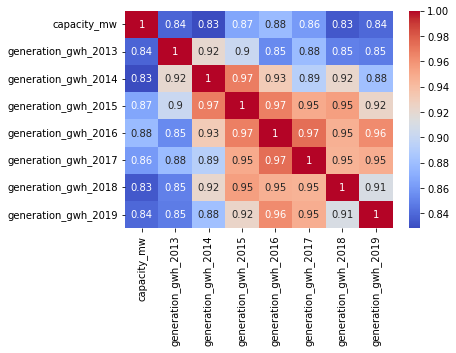

In [0]:
#the generated electricity is most likely in general correlated to the capacity of a plant. If so, then by how much.
import seaborn as sns
cols = ['capacity_mw', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019']

# Convert the selected columns to numeric type
pd_df[cols] = pd_df[cols].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
corr_matrix = pd_df[cols].corr()

# Print the correlation matrix
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')